In [1]:
#optimal transport library
import ot

from sklearn.decomposition import PCA

#bread and butter
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#machine learning library
import sklearn

#statistics
import scipy

#machine learning library for time series
import numba
from numba import jit, njit

import tqdm
from tqdm import tqdm
import copy
import cvxpy as cp

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#import numpy as tnp
import warnings
warnings.filterwarnings('ignore')

import dfply
from dfply import *
import math
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import covariance
import itertools
import copy
import math


import matplotlib.pyplot as plt
import torch
import datetime
from datetime import date
from eod import EodHistoricalData

import os
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

#import helpers
import ray
import pytz
import time
#misc
%matplotlib inline
plt.style.use('matplotlibrc')



/Users/hetankevin/miniforge3/lib/python3.9/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
eastern = pytz.timezone('US/Eastern')
api_key = "6149ef1b322b37.04228930"
client = EodHistoricalData(api_key)

In [3]:
components = client.get_fundamental_equity('GSPC.INDX')['Components']
tickers = [components[str(i)]['Code'] for i in range(len(components))]

import os
opens = {}
files = os.listdir('DailyData')
for file in tqdm(files):
    df = pd.read_pickle('DailyData/'+file)
    #df.index = pd.to_datetime(df['date'])
    df.index = pd.to_datetime(df.Date.str[:-15])
    opens[file[:-3]] = df


# save dictionary as pickle file
import pickle
def savePickle(dictionary, filename):
    pickle_out = open(filename+'.pickle', 'wb')
    pickle.dump(dictionary, pickle_out)
    pickle_out.close()

#savePickle(splits, 'splits')

# create new dictionary from pickle file
pickle_in = open('pricesNotAdj.pickle', 'rb')
prices = pickle.load(pickle_in)
for tick in prices.keys(): #prices.keys()
    prices[tick].index = pd.to_datetime(prices[tick].index)
    
    
tickers = prices.keys()
for tick in tickers:
    for item in ['open', 'high', 'low']:
        price = copy.deepcopy(prices[tick])
        result = prices[tick].close / prices[tick].adjusted_close
        price[item] /= result
        prices[tick] = price
            #data['volume'][data['volume'].index < sp['date']] *= int(sp['split'][0])

pricesDF = pd.concat(prices, axis=1)
pricesDF = pricesDF[pricesDF.index > '2003-12-01'].dropna(axis=1)
adjclose = pricesDF.loc[:, (tickers, ['adjusted_close'])]
adjopen = pricesDF.loc[:, (tickers, ['open'])]
volumes = pricesDF.loc[:, (tickers, ['volume'])]
adjclose.columns = adjclose.columns.droplevel(1)
adjopen.columns = adjopen.columns.droplevel(1)
volumes.columns = volumes.columns.droplevel(1)

opensDF = pd.concat(opens, axis=1)
#opensDF.index = pd.to_datetime(opensDF.index)
#opensDF = opensDF[opensDF.index > '2005-01-01']#.dropna(axis=0)
realopen = opensDF.loc[:, (adjclose.columns, ['open'])]
realopen.columns = realopen.columns.droplevel(1)
realopen = realopen[realopen.columns[(realopen.isna().sum(axis=0) < 20)]].iloc[:-2,:].dropna(axis=0)
vwapopen = opensDF.loc[:, (adjclose.columns, ['vwap_till_time'])]
vwapopen.columns = vwapopen.columns.droplevel(1)
vwapopen = vwapopen[vwapopen.columns[(vwapopen.isna().sum(axis=0) < 20)]].iloc[:-2,:].dropna(axis=0)
vwap2 = opensDF.loc[:, (adjclose.columns, ['vwap_2'])]
vwap2.columns = vwap2.columns.droplevel(1)
vwap2 = vwap2[vwap2.columns[(vwap2.isna().sum(axis=0) < 20)]].iloc[:-2,:].dropna(axis=0)
timeopen = opensDF.loc[:, (adjclose.columns, ['open_at_time'])]
timeopen.columns = timeopen.columns.droplevel(1)
timeopen = timeopen[timeopen.columns[(timeopen.isna().sum(axis=0) < 20)]].iloc[:-2,:].dropna(axis=0)
altclose = opensDF.loc[:, (adjclose.columns, ['close'])]
altclose.columns = altclose.columns.droplevel(1)
altclose = altclose[altclose.columns[(altclose.isna().sum(axis=0) < 20)]].iloc[:-2,:].dropna(axis=0)
adjustment_factors = adjclose[altclose.columns].divide(altclose, axis=1)

tradeopen = vwapopen.multiply(adjustment_factors, axis=1)
adjclose = adjclose.loc[adjclose.index.intersection(adjopen.index).intersection(tradeopen.index), adjclose.columns.intersection(adjopen.columns).intersection(tradeopen.columns)]
adjopen = adjopen.loc[adjclose.index.intersection(adjopen.index).intersection(tradeopen.index), adjclose.columns.intersection(adjopen.columns).intersection(tradeopen.columns)]
tradeopen = tradeopen.loc[adjclose.index.intersection(adjopen.index).intersection(tradeopen.index), adjclose.columns.intersection(adjopen.columns).intersection(tradeopen.columns)]
tradeopen

100%|████████████████████████████████████████| 345/345 [00:02<00:00, 116.50it/s]


,GPS,FISV,CSX,ADP,ANSS,AFL,SO,REG,LMT,EIX,...,MCHP,TYL,BF-B,MAA,BRK-B,HD,EXC,LH,MTD,SLB
2003-12-02,13.818893,9.5009,1.399173,25.410693,10.3242,12.245113,12.800754,18.862018,27.817041,11.425766,...,10.538153,8.6405,6.775141,15.071609,56.205200,23.941916,15.725525,36.3712,39.5854,16.361187
2003-12-03,13.735035,9.5813,1.393372,25.413703,10.0975,12.122557,12.897768,18.976699,27.762602,11.693208,...,10.808925,8.9713,6.794568,14.907823,56.158701,23.704187,15.800216,36.9984,39.3446,16.649882
2003-12-04,13.906331,9.5829,1.388163,25.074258,9.7270,12.080397,12.901643,18.980240,28.012334,11.685714,...,10.673900,8.2023,6.821478,14.691212,56.047000,23.358739,15.853296,36.2391,39.3381,16.393201
2003-12-05,13.476860,9.6314,1.393934,25.211579,9.7807,12.113439,12.957638,18.810454,28.677260,11.566062,...,10.102946,8.0202,6.770481,14.789361,56.195986,22.746885,16.062554,36.0212,39.2447,16.755884
2003-12-08,13.583877,9.6690,1.384267,25.246635,9.6532,11.995251,12.991930,18.701219,28.533987,11.683125,...,9.704591,8.3106,6.782807,14.825124,55.820200,22.728087,16.084828,36.0630,39.3678,17.072967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,16.504900,106.8496,35.489300,226.360400,342.4635,62.951800,68.507300,72.945000,378.001900,63.712900,...,77.254700,474.0399,66.513900,206.320900,315.530100,360.210100,56.831808,274.5743,1485.5541,37.007100
2022-01-21,15.788700,106.0724,34.332800,220.547600,331.7657,61.632300,68.513700,70.427200,372.860600,63.564400,...,74.002100,453.3519,66.739400,204.529300,309.462300,349.932300,57.140128,272.3970,1464.6488,36.892300
2022-01-24,15.529000,104.0439,34.030600,218.008800,321.4479,60.024000,67.967400,69.041200,368.404800,62.646800,...,71.740300,440.7201,65.711100,201.347800,299.570600,344.813600,57.004149,270.6658,1427.6037,35.316900
2022-01-25,16.956900,101.8064,33.768800,216.009000,326.2102,60.860100,67.060700,70.249600,382.891300,61.587300,...,72.607700,453.7476,66.007800,199.804300,300.762700,356.593200,55.605107,270.2013,1423.9669,36.303200


In [4]:
def getMinArr(file='minutesDict.pickle.pickle'):
    pickle_in = open(file, 'rb')
    minutes = pickle.load(pickle_in)
    mindexes = [i.index for i in minutes.values()]
    mindex = mindexes[0]
    for i in range(1, len(mindexes)):
        mindex = mindex.union(mindexes[i])
    mindex = mindex.intersection(adjopen.index.date)
    for k in minutes.keys():
        minutes[k] = minutes[k].reindex(mindex)
    minArr = np.array([minutes[k].values for k in minutes.keys()])
    return minArr

#adjustments
def ffill(arr):
    mask = np.isnan(arr)
    idx = np.where(~mask,np.arange(mask.shape[1]),0)
    np.maximum.accumulate(idx,axis=1, out=idx)
    return arr[np.arange(idx.shape[0])[:,None], idx]

def getData():
    minArr = getMinArr()
    minFill = np.array([ffill(minArr[i,:,:]) for i in range(len(minArr))])
    minclose = pd.DataFrame(minFill[:, :, -1].T, index = adjclose.index, columns = adjclose.columns)
    adjustments = minclose / adjclose

    minArr = minArr / adjustments.values.T[:,:,None]
    minHigh = getMinArr('minutesHigh.pickle.pickle') / adjustments.values.T[:,:,None]
    minLow = getMinArr('minutesLow.pickle.pickle') / adjustments.values.T[:,:,None]
    minWap = (minArr + minHigh + minLow)/3
    
    minWapFill = np.array([ffill(minWap[i,:,:]) for i in range(len(minWap))])
    minCloseFill = np.array([ffill(minArr[i,:,:]) for i in range(len(minArr))])
    tradeclose = pd.DataFrame(minCloseFill[:,:, -10:].mean(axis=2).T, index = adjclose.index, columns = adjclose.columns)
    priceclose = pd.DataFrame(minCloseFill[:,:, -11].T, index = adjclose.index, columns = adjclose.columns)
    
    monthrets = adjclose[np.array([i.day for i in adjclose.index.date]) == 1].pct_change(1).dropna()
    signalrets = ((priceclose - adjclose.shift(1)) / adjclose.shift(1)).dropna()
    traderets = tradeclose.pct_change(1).dropna()
    returns = adjclose.pct_change(1).dropna().reindex(signalrets.index.intersection(traderets.index))
    traderets = traderets.reindex(returns.index)
    signalrets = signalrets.reindex(returns.index)
    
    return tradeclose, priceclose, monthrets, signalrets, traderets, returns

tradeclose, priceclose, monthrets, signalrets, traderets, returns = getData()

In [349]:
#minWapFill = np.array([ffill(minWap[i,:,:]) for i in range(len(minWap))])
#minCloseFill = np.array([ffill(minArr[i,:,:]) for i in range(len(minArr))])
#tradeclose = pd.DataFrame(minCloseFill[:,:, -10:].mean(axis=2).T, index = adjclose.index, columns = adjclose.columns)
#priceclose = pd.DataFrame(minCloseFill[:,:, -11].T, index = adjclose.index, columns = adjclose.columns)

In [350]:
#monthrets = adjclose[np.array([i.day for i in adjclose.index.date]) == 1].pct_change(1).dropna()
#signalrets = ((priceclose - adjclose.shift(1)) / adjclose.shift(1)).dropna()
#traderets = tradeclose.pct_change(1).dropna()
#returns = adjclose.pct_change(1).dropna().reindex(signalrets.index.intersection(traderets.index))
#traderets = traderets.reindex(returns.index)
#signalrets = signalrets.reindex(returns.index)

# Residual Creation

Here, we use five-factor PCA residuals for now, on monthly close returns. This is suboptimal, compared to the IPCA of Kelly et. al. and as such I recommend getting and cleaning CSRP/Compustat or even Yahoo Finance data as soon as possible to effectively replicate the analysis in the paper. 

Text(0.5, 1.0, 'PCA on Returns Matrix')

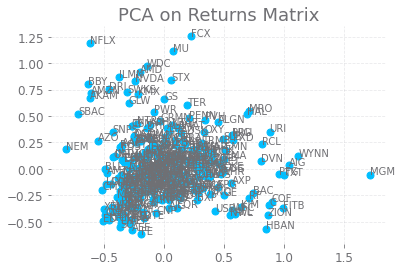

In [5]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=5, whiten=False).fit_transform(monthrets.iloc[:1000,:].dropna().T)
#pca = KernelPCA(n_components=2, kernel='rbf').fit_transform(returns.loc[dates_train].T)
fig, ax = plt.subplots()
ax.scatter(pca[:,0], pca[:, 1])
for i, txt in enumerate(adjclose.columns):
    ax.annotate(txt, (pca[i, 0], pca[i, 1]))
ax.set_title("PCA on Returns Matrix")

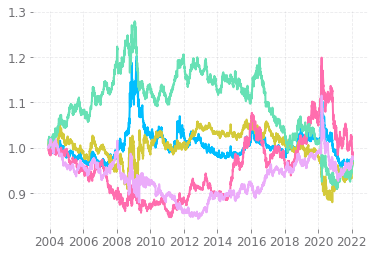

In [6]:
pcaLong = pd.DataFrame(PCA(n_components=5, whiten=True).fit_transform(returns), index = returns.index)
plt.plot(np.cumprod(1+pcaLong/311))
#plt.plot(pcaLong/10)

In [7]:
pcaLong

,0,1,2,3,4
date,,,,,
2003-12-03,0.352224,0.873660,-0.117486,0.563340,0.037916
2003-12-04,0.044927,0.213588,-0.957062,1.754313,1.094420
2003-12-05,0.575748,0.849719,-0.563282,1.197018,-0.611185
2003-12-08,-0.412423,0.729842,0.177118,0.862431,0.307177
2003-12-09,0.746634,1.642555,-0.547306,1.563077,-0.625635
...,...,...,...,...,...
2022-01-20,1.008559,0.535480,0.080097,0.875543,0.651863
2022-01-21,1.165792,0.323234,1.321291,1.075118,-0.910756
2022-01-24,-0.517241,-0.181584,-0.213554,-1.587413,-1.088171


## PCA Factor Computation

This is the first bit of the meat involved in the residual computation. Here, we have a multiprocessed piece of code that computes factor returns for the past `olslookback` days, with the `n_factors`-PCA fit on the past `lookback` days. Expect `factors` to be a `pd.Series` where each date contains a `pd.DataFrame` of the relevant factor returns, ready for residual computation with OLS.

In [418]:
n_factors = 5
lookback = 252
olslookback = 60
oos = False

def pca_fit(date, returns=returns, signalrets=signalrets, n_components=n_factors, 
            lookback=lookback, olslookback=olslookback, oos=True):
    retdate = returns[returns.index < date] if oos else returns[returns.index <= date]
    X = retdate.iloc[-lookback:, :].values
    X_index = retdate.iloc[-lookback:, :].index
    X_mean = np.mean(X, axis=0, keepdims=True)
    X_vol = np.sqrt(np.mean((X-X_mean)**2,axis=0,keepdims=True))
    X_norm = (X - X_mean) / X_vol
    Corr = X_norm.T @ X_norm
    #Corr = X.T @ X
    eigVal, eigVec = np.linalg.eigh(Corr)
    components = eigVec[:, -n_components:].real 
    components = components/np.sum(np.abs(components),0)
    
    X_reg = X[-olslookback:,:]
    
    wt = (1/X_vol)#/np.sum(np.abs(1/X_vol)) #inverse volatility weight
    factors = np.dot(X_reg * wt, components) 
    factorsDF = pd.DataFrame(factors, index = X_index[-olslookback:], 
                        columns = [i for i in range(n_components)])
    
    dayfactors = np.dot(np.array([signalrets.loc[date]]) * wt, components).squeeze()
    dayfactorSeries = pd.Series(dayfactors, index = [i for i in range(n_components)])
    
    betas = np.linalg.pinv(factors.T @ factors) @ factors.T @ X_reg
    residuals = signalrets.loc[date] - np.dot(dayfactors, betas)
    #print(residuals)
    #print(residuals)
    #print(residuals / (1+np.sum(np.abs(betas))))
    #residuals = residuals / (1+np.sum(np.abs(betas)))
    
    return factorsDF, dayfactorSeries, residuals, components, betas, wt

In [149]:
np.abs(betas).sum(1)

array([[3.94566792, 3.88577821, 2.71385412, ..., 2.15442595, 1.60079338,
        5.89460505],
       [3.13790049, 3.43219446, 2.62599187, ..., 2.09123291, 1.24618838,
        5.80373913],
       [2.77572716, 3.48002603, 2.57998059, ..., 2.10530912, 1.09401933,
        5.28607464],
       ...,
       [4.87473774, 2.70438665, 3.20387902, ..., 3.7306817 , 3.69816142,
        5.41165308],
       [6.30331258, 2.17492012, 3.39634615, ..., 3.74927867, 3.72751578,
        5.27213434],
       [5.09144962, 1.99016344, 3.1337374 , ..., 3.99783574, 3.53355298,
        5.74189496]])

In [145]:
np.abs(eigens).sum(1)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [419]:
results = []
for date in tqdm(returns.index[lookback:]):
    results.append(pca_fit(date, oos=oos))

100%|███████████████████████████████████████| 4281/4281 [01:23<00:00, 51.31it/s]


In [421]:
factors = [res[0] for res in results]
dayFactors = [res[1] for res in results]
dayFactors = pd.DataFrame(dayFactors, index = returns.index[lookback:])
residuals = pd.DataFrame([res[2] for res in results], index = returns.index[lookback:])
eigens = np.array([res[3] for res in results])
betas = np.array([res[4] for res in results])
vols = np.array([res[5] for res in results])
vols = vols.reshape(vols.shape[0], vols.shape[2])

<AxesSubplot:xlabel='date'>

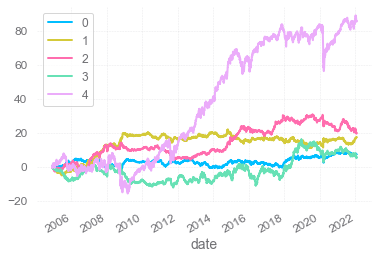

In [423]:
(dayFactors).cumsum().plot()

In [424]:
import multiprocessing
from itertools import repeat
from concurrent.futures import ProcessPoolExecutor

def getHedgeWeights(stock, returns=returns, betas=betas, eigens = eigens, 
                    lookback=lookback, olslookback=olslookback, vols=vols):
    hedge = pd.DataFrame(0, index=returns[lookback:].index, columns=returns.columns)
    j = np.argmax(returns.columns == stock)
    for i,date in enumerate(hedge.index):
        hedgeWeight = -((betas[i, :, j][:, None] * eigens[i].T).sum(0)) * vols[i]
        normfactor = (1+np.sum(np.abs(hedgeWeight)))
        hedgeWeight = hedgeWeight / normfactor
        hedge.loc[date] += hedgeWeight
        hedge.loc[date, stock] += 1 / normfactor
    return hedge

with ProcessPoolExecutor(max_workers=10, mp_context=multiprocessing.get_context('fork')) as executor:
    future = executor.map(getHedgeWeights, returns.columns)
    executor.shutdown()
hedgeWeights = list(future)

In [428]:
from functools import reduce
hedge = reduce(lambda x, y: x.add(y), hedgeWeights)
hedgeArr = np.array(hedgeWeights).transpose(1,2,0)
print(np.sum(np.sum(hedgeArr @ np.ones(len(returns.columns)) - hedge)))
#hedgenorm = hedge / returns.shape[1]

0.0


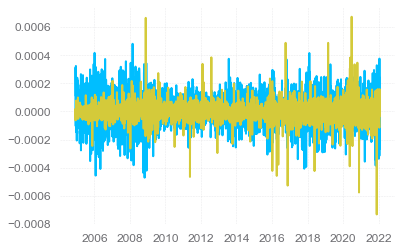

In [429]:
plt.plot((hedge*traderets).mean(1))
plt.plot(residuals['GPS']/311)

<AxesSubplot:xlabel='date'>

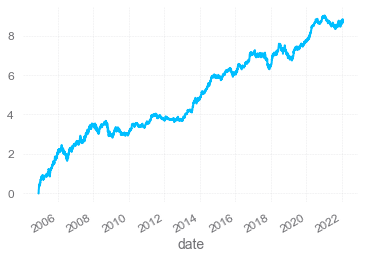

In [430]:
((hedge * traderets).sum(1)[lookback:]).cumsum().plot()

<AxesSubplot:xlabel='date'>

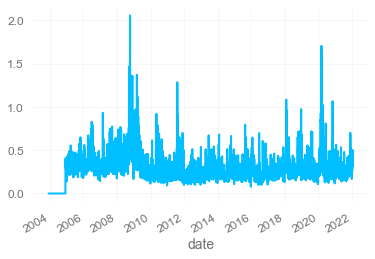

In [431]:
(hedge*traderets).abs().sum(1).plot()

<AxesSubplot:xlabel='date'>

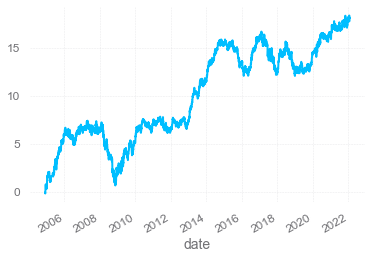

In [432]:
(residuals.sum(1)).cumsum().plot()

## Avellenada and Lee

We obtain factor loadings of each stock via regressing each stock's past `olslookback`-day returns on the factors themselves. Residuals are computed 'out-of-sample' as such: the residual at time $t$ is given by subtracting $\text{Factors}_{t} \beta_{t-1}$ from $r_{t}$, where $r_{t} = \frac{p_t - p_{t-1}}{p_{t-1}}$. 

As mentioned earlier, $\text{Factors}_t$ is generated by fitting on the past $t-lookback$ to $t-1$ days, and transforming either the signal or VWAP returns at time $t$.

We use the 3:50pm price as $p_t$ to compute returns, stored in `signalrets`. Realistically, we can only compute signals from that price. Trades are executed with the 3:50pm to 4:00pm VWAP, stored in `traderets`.

Note that as we compute values based on $r_t$, we will have to shift `returns` by 1 when taking the product of it with `weights` (think $w_t \cdot r_{t+1}$) to get a backtest result. This will not be necessary if using `bt`, however.

In [334]:
sscores.mean(1).mean()

0.01503379737514155

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2004-12-06  2004-12-06
End Period                 2022-01-26  2022-01-26
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          202.78%     409.33%
CAGR﹪                     6.67%       9.96%

Sharpe                     1.75        0.59
Prob. Sharpe Ratio         100.0%      99.28%
Smart Sharpe               1.6         0.54
Sortino                    2.8         0.83
Smart Sortino              2.56        0.76
Sortino/√2                 1.98        0.59
Smart Sortino/√2           1.81        0.54
Omega                      1.36        1.36

Max Drawdown               -9.5%       -55.19%
Longest DD Days            572         1772
Volatility (ann.)          3.76%       19.24%
R^2                        0.01        0.01
Information Ratio          -0.02       -0.02
Calmar                     0.7      

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2009-01-14,2009-03-04,2009-05-08,114,-9.503997,-9.337633
2,2008-05-28,2008-09-17,2008-10-17,142,-6.560563,-6.317058
3,2020-03-02,2020-03-17,2020-03-25,23,-4.399557,-4.184763
4,2021-05-14,2021-10-22,2022-01-26,257,-4.396952,-4.256166
5,2016-04-13,2016-11-22,2017-11-06,572,-3.482670,-3.312279


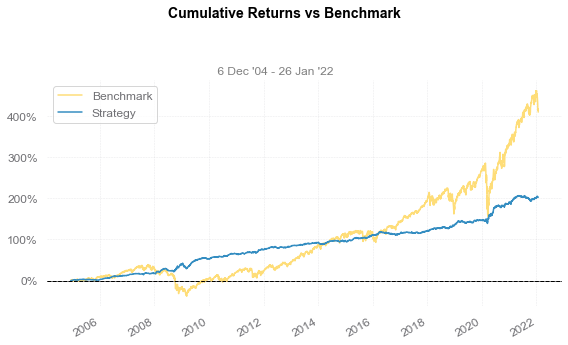

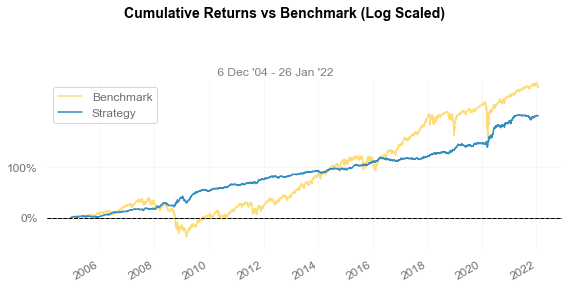

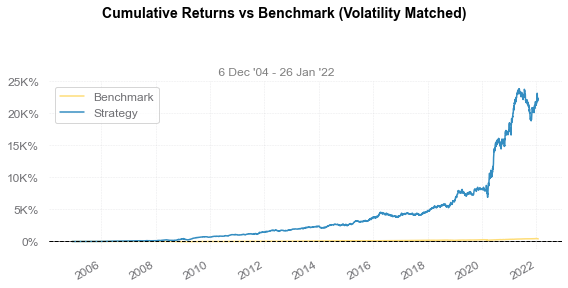

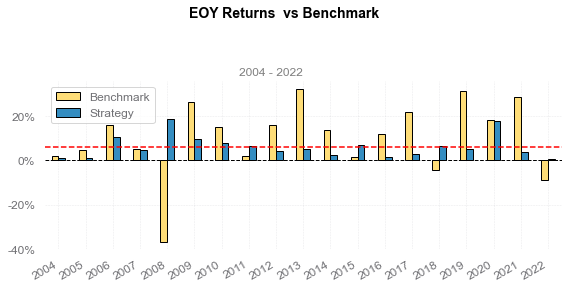

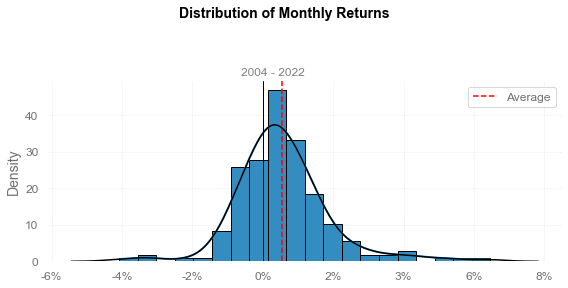

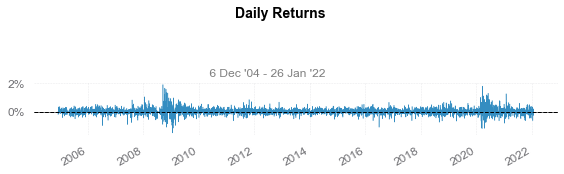

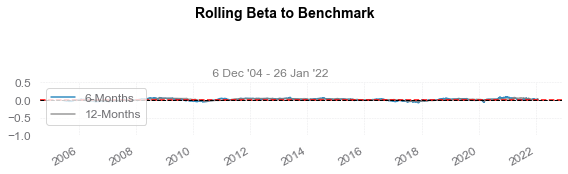

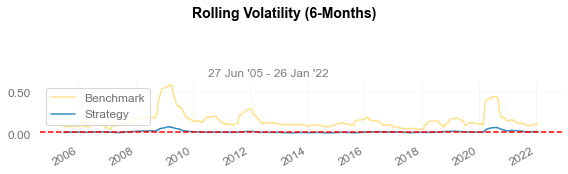

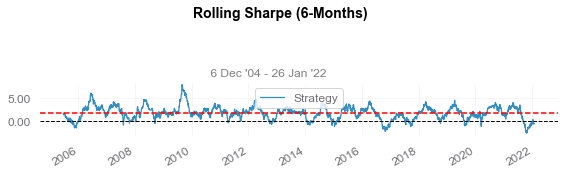

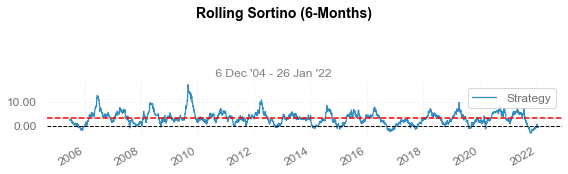

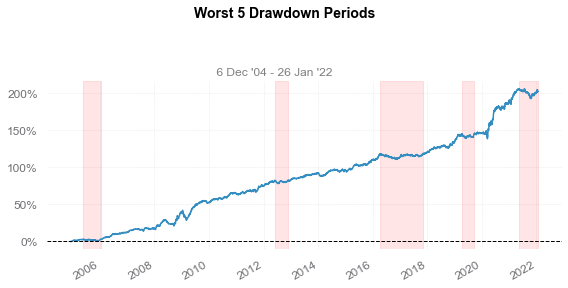

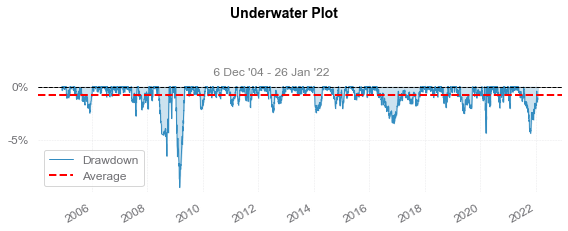

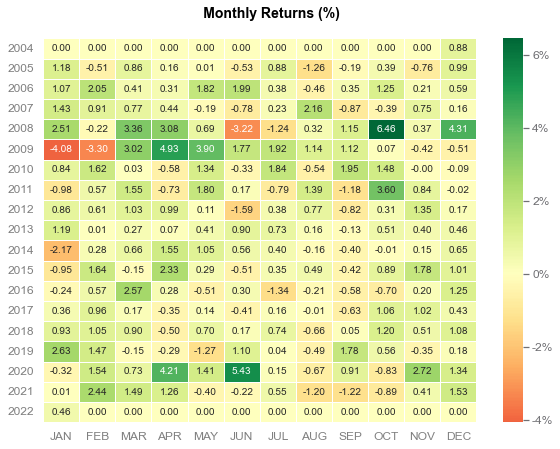

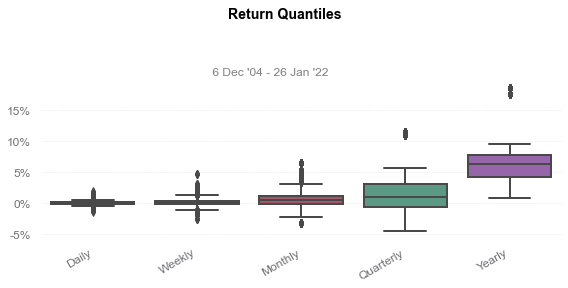

In [439]:
import quantstats as qs
sumresid = residuals.cumsum() #use residuals as signals, but not as tradable instruments
sscores = ((sumresid - sumresid.ewm(20).mean())/sumresid.ewm(20).std())
signals = -(sscores > 1.25).astype(int) + (sscores < -1.25).astype(int)
sigArr = signals.div(signals.abs().sum(1), 0).to_numpy()
weightssc = np.array([hedgeArr[i] @ sigArr[i] for i in range(len(signals))])
weightssc /= np.abs(weightssc).sum(1)[:, None]
qs.reports.full((weightssc * 
                 traderets.reindex(signals.index).shift(-1)).sum(1), 'SPY')
plt.style.use('matplotlibrc')

In [434]:
import statsmodels.api as sm
def arsignal(stock, window=60):
    slopes = []
    intercepts = []
    rs = []
    stds = []
    xs = []
    #for i in range(window+1, len(stock)):
    #    windex = stock[i-window-1:i]
    for i, date in enumerate(stock.index[window+1:]):
        windex = (stock[stock.index <= date][-(window+1):])
        x = windex[:-1]
        y = windex[1:]
        #plt.plot(x)
        #plt.plot(y)
        #break
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y) #shift signals by 1 later
        slopes.append(slope)
        intercepts.append(intercept)
        rs.append(r_value**2)
        stds.append(np.std(y - (intercept + slope*x)))
        xs.append(y[-1])
    return np.array(slopes), np.array(intercepts), np.array(rs), np.array(stds), np.array(xs)
slopes, intercepts, rs, stds, xs = arsignal(residuals['AAPL'])

In [435]:
with ProcessPoolExecutor(max_workers=10, mp_context=multiprocessing.get_context('fork')) as executor:
    future = executor.map(arsignal, [residuals[stock] for stock in returns.columns])
    executor.shutdown()
arsignals = list(future)

In [436]:
window = 60
arindex = residuals.index[window+1:]
slopes = pd.DataFrame(np.array([signal[0] for signal in arsignals]).T, 
                      index=arindex, columns=returns.columns)
intercepts = pd.DataFrame(np.array([signal[1] for signal in arsignals]).T, 
                      index=arindex, columns=returns.columns)
rs = pd.DataFrame(np.array([signal[2] for signal in arsignals]).T, 
                      index=arindex, columns=returns.columns)
stds = pd.DataFrame(np.array([signal[3] for signal in arsignals]).T, 
                      index=arindex, columns=returns.columns)
xs = pd.DataFrame(np.array([signal[4] for signal in arsignals]).T, 
                      index=arindex, columns=returns.columns)

<AxesSubplot:xlabel='date'>

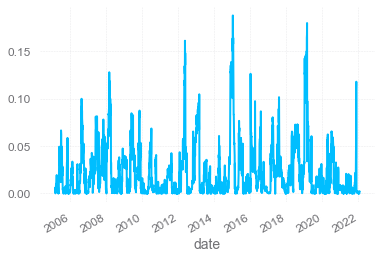

In [440]:
rs.GPS.plot()

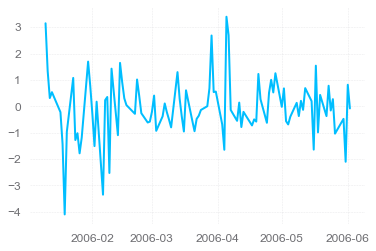

In [441]:
#plt.plot((xs*np.sqrt((1-slopes**2) / (stds**2))+sscoresar)['AAPL'][200:300])
plt.plot((sscoresar)['AAPL'][200:300])

<AxesSubplot:xlabel='date'>

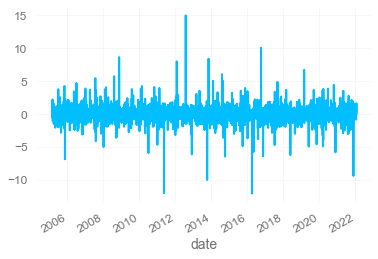

In [442]:
sscoresar.GPS.plot()

<AxesSubplot:xlabel='date'>

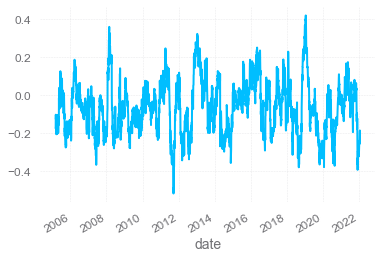

In [381]:
(((-intercepts)*np.sqrt(1-slopes**2))/((1-slopes)*stds)).AAPL.plot()

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2005-03-04  2005-03-04
End Period                 2022-01-26  2022-01-26
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          7,993.15%   392.40%
CAGR﹪                     29.67%      9.89%

Sharpe                     2.63        0.59
Prob. Sharpe Ratio         100.0%      99.19%
Smart Sharpe               2.47        0.55
Sortino                    4.37        0.83
Smart Sortino              4.1         0.78
Sortino/√2                 3.09        0.58
Smart Sortino/√2           2.9         0.55
Omega                      1.58        1.58

Max Drawdown               -13.98%     -55.19%
Longest DD Days            463         1772
Volatility (ann.)          10.16%      19.35%
R^2                        0.0         0.0
Information Ratio          0.05        0.05
Calmar                     2.12       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2009-11-30,2010-01-20,2010-07-12,224,-13.979631,-12.938217
2,2013-02-06,2013-07-10,2014-05-15,463,-11.341580,-11.162306
3,2008-05-12,2008-09-17,2008-10-15,156,-10.823411,-9.569374
4,2020-03-03,2020-03-11,2020-05-13,71,-10.365751,-9.829639
5,2009-01-02,2009-03-18,2009-05-29,147,-10.028767,-9.877273


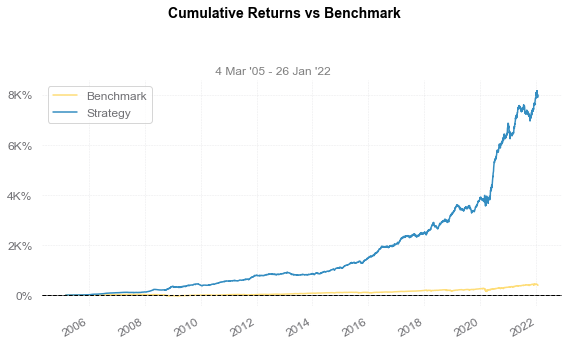

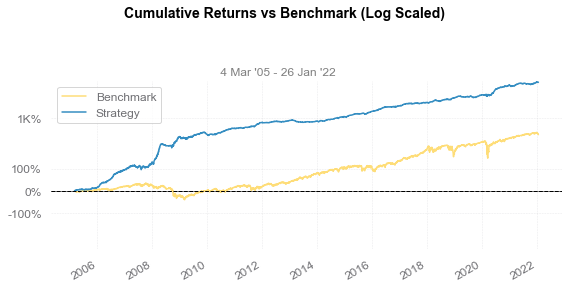

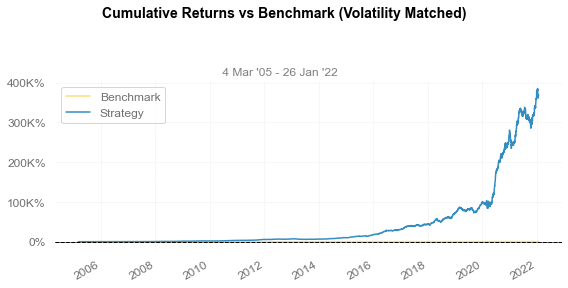

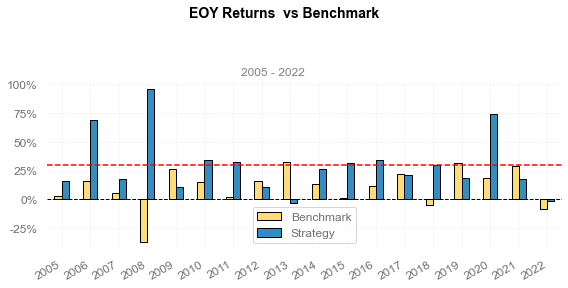

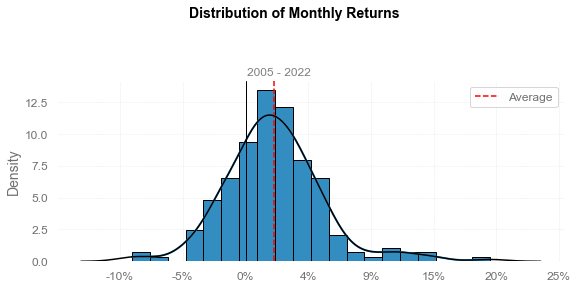

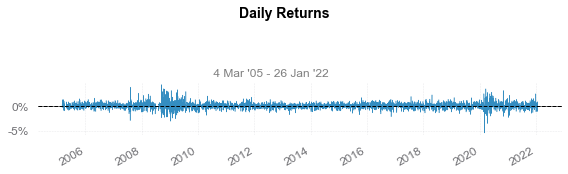

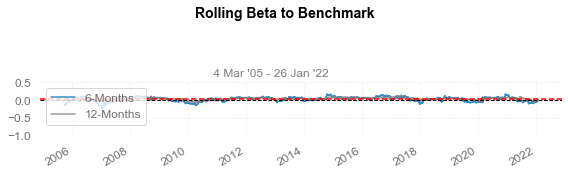

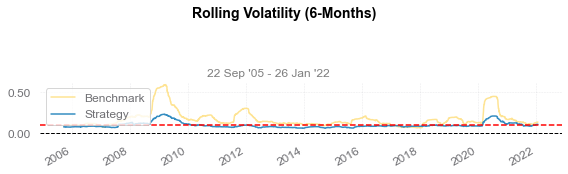

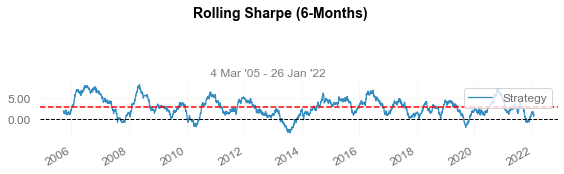

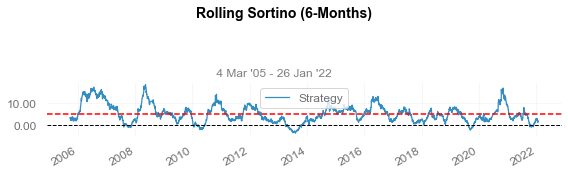

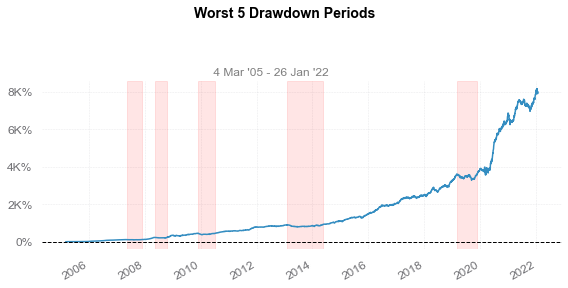

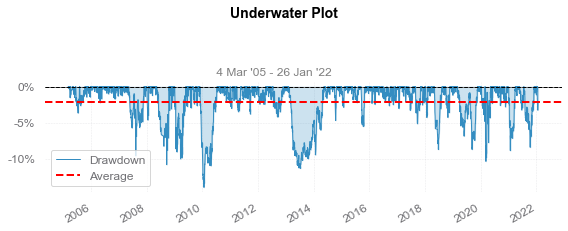

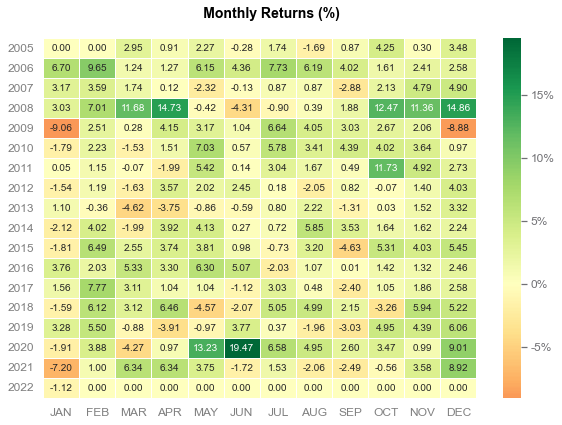

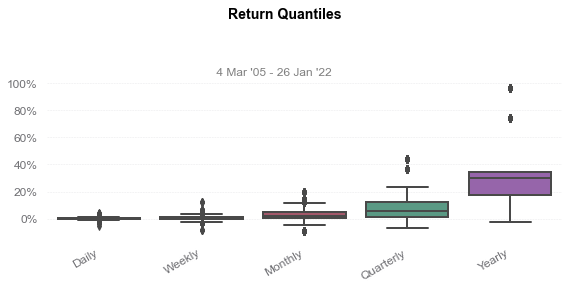

In [463]:
means = (-intercepts*np.sqrt(1-slopes**2))/((1-slopes)*stds)
demeans = np.sqrt((1-slopes**2) / (stds**2)).mul(intercepts.mean(1) / (1-slopes.mean(1)), 0)
sscoresar = xs*np.sqrt((1-slopes**2) / (stds**2)) + means + demeans # xs*np.sqrt((1-slopes**2) / (stds**2)) + 
sscoresar *= slopes < 0.95
sscoresArr = sscoresar.to_numpy()
signalsar = np.zeros((len(sscoresar.index), len(sscoresar.columns)))
enthresh = 0.5
exthresh = 0.2
for i in range(1, len(signalsar)):
    for j in range(signalsar.shape[1]):
        if signalsar[i-1,j] == 1 and sscoresArr[i,j] > -exthresh: #sell to close
            signalsar[i,j] == 0
        if signalsar[i-1,j] == -1 and sscoresArr[i,j] < exthresh: #buy to close
            signalsar[i,j] = 0
        if sscoresArr[i,j] > enthresh and signalsar[i,j] == 0: #sell to open
            signalsar[i,j] = -1
        if sscoresArr[i,j] < -enthresh and signalsar[i,j] == 0: #buy to open
            signalsar[i,j] = 1
signalsar = pd.DataFrame(signalsar, sscoresar.index, sscoresar.columns)
signalsar = signalsar.div(signalsar.abs().sum(1),0)
signalsArr = signalsar.to_numpy()
weightsar = np.array([hedgeArr[i+window+1] @ signalsArr[i] for i in range(len(signalsar.index))])
weightsar /= np.abs(weightsar).sum(1)[:, None]
qs.reports.full((4*weightsar * 
                 traderets.reindex(signalsar.index).shift(-1)).sum(1), 'SPY')
plt.style.use('matplotlibrc')

                           Strategy
-------------------------  ----------
Start Period               2005-03-04
End Period                 2022-01-26
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          191.73%
CAGR﹪                     6.54%

Sharpe                     2.27
Prob. Sharpe Ratio         100.0%
Smart Sharpe               2.23
Sortino                    3.66
Smart Sortino              3.6
Sortino/√2                 2.59
Smart Sortino/√2           2.55
Omega                      1.49

Max Drawdown               -4.65%
Longest DD Days            477
Volatility (ann.)          2.84%
Calmar                     1.4
Skew                       0.37
Kurtosis                   10.13

Expected Daily %           0.03%
Expected Monthly %         0.53%
Expected Yearly %          6.13%
Kelly Criterion            18.47%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.27%
Expected Shortfall (cVaR)  -0.27%

Max Consecutive Wins       1

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2009-01-21,2009-06-26,2010-05-13,477,-4.652843,-4.521131
2,2020-04-08,2020-05-19,2021-01-04,271,-4.423460,-4.058700
3,2008-10-28,2008-12-09,2008-12-22,55,-2.790401,-2.777685
4,2019-12-13,2020-03-10,2020-03-16,94,-2.651194,-2.538224
5,2005-12-16,2006-03-01,2006-04-26,131,-2.036867,-1.959300


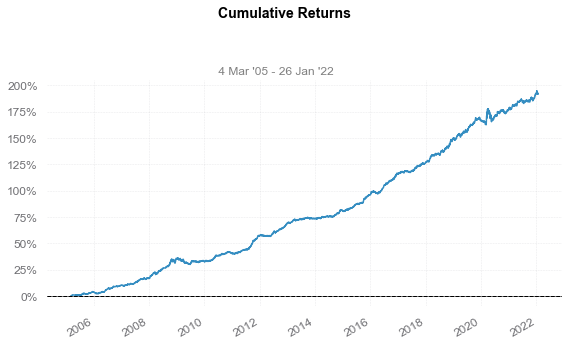

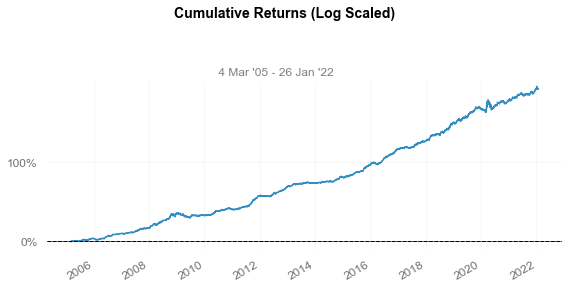

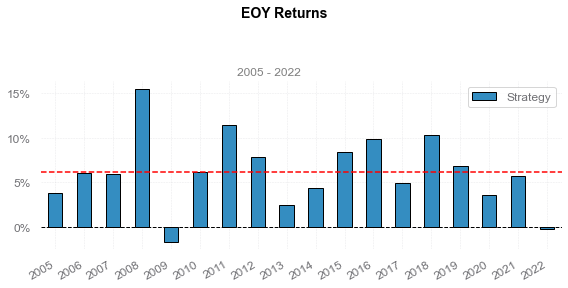

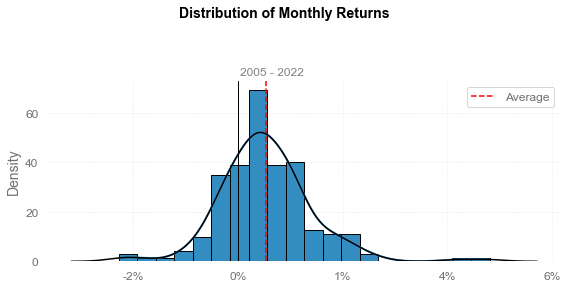

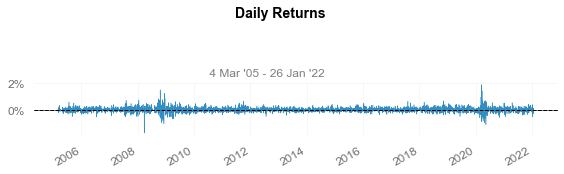

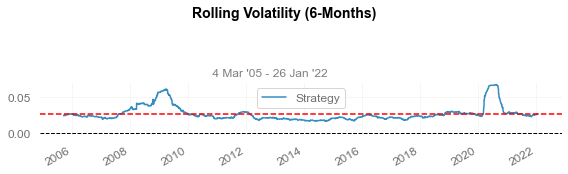

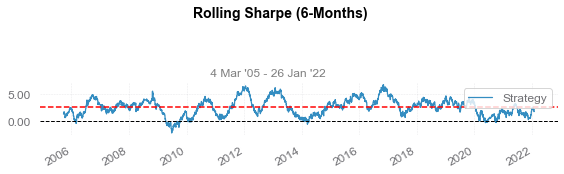

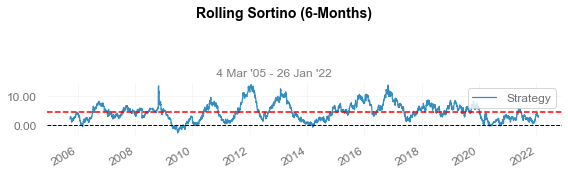

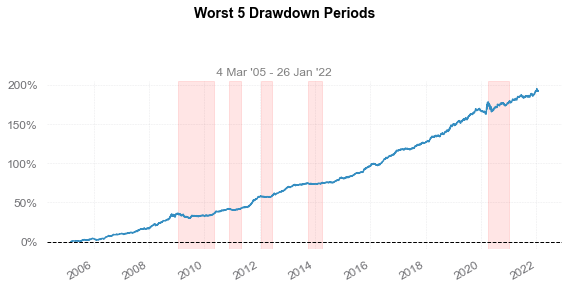

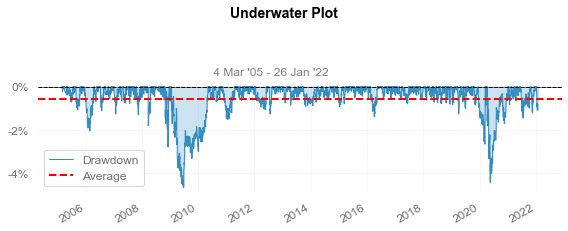

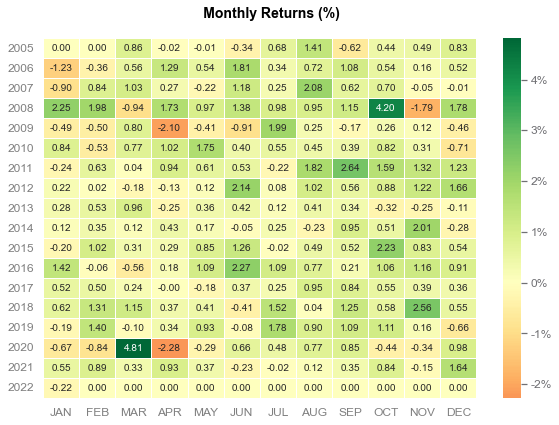

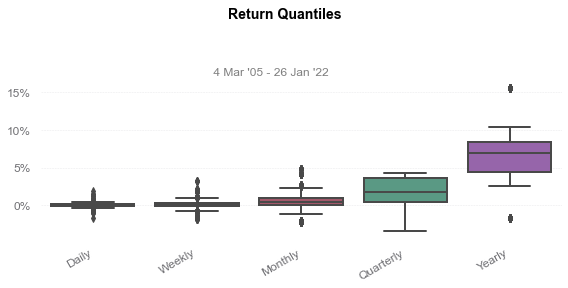

                           Strategy
-------------------------  ----------
Start Period               2004-12-06
End Period                 2022-01-26
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          19.4%
CAGR﹪                     1.04%

Sharpe                     1.82
Prob. Sharpe Ratio         100.0%
Smart Sharpe               1.62
Sortino                    3.1
Smart Sortino              2.75
Sortino/√2                 2.19
Smart Sortino/√2           1.95
Omega                      1.4

Max Drawdown               -1.11%
Longest DD Days            751
Volatility (ann.)          0.57%
Calmar                     0.94
Skew                       1.35
Kurtosis                   12.49

Expected Daily %           0.0%
Expected Monthly %         0.09%
Expected Yearly %          0.94%
Kelly Criterion            15.5%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.06%
Expected Shortfall (cVaR)  -0.06%

Max Consecutive Wins       15
Max

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-04-27,2021-10-26,2022-01-26,274,-1.108212,-1.099655
2,2016-04-26,2016-12-30,2018-05-17,751,-0.756655,-0.704963
3,2009-02-11,2009-03-09,2009-04-02,50,-0.715455,-0.714070
4,2007-02-15,2008-01-15,2008-02-05,355,-0.697217,-0.665789
5,2015-06-05,2015-10-27,2016-01-26,235,-0.633160,-0.581706


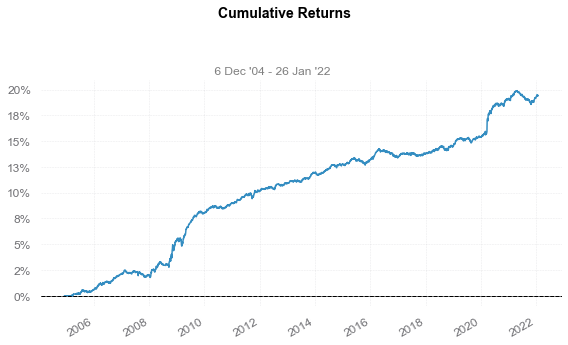

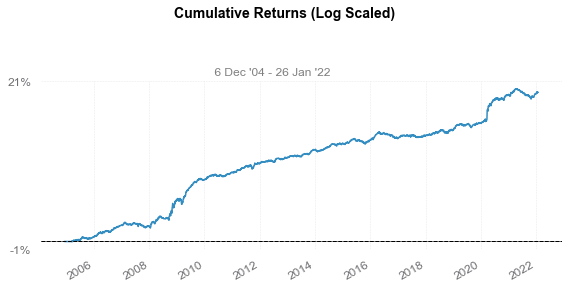

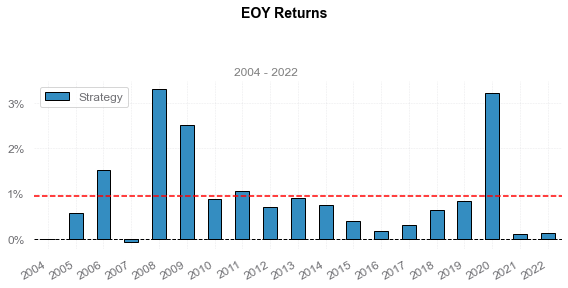

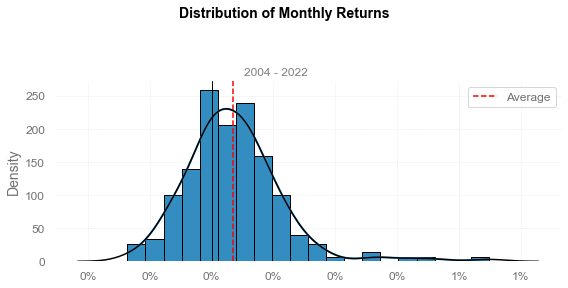

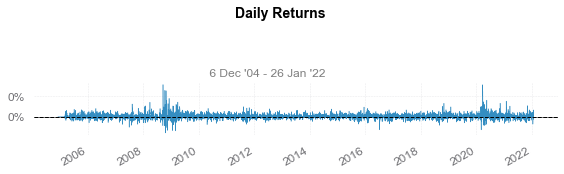

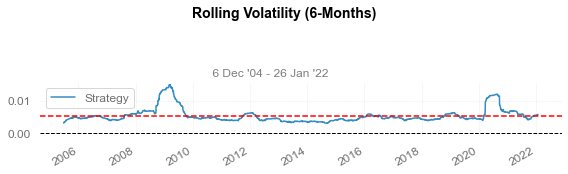

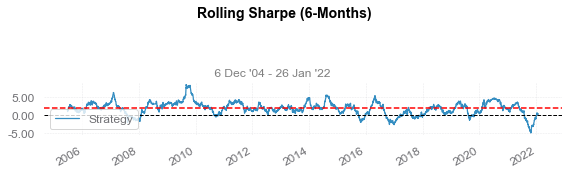

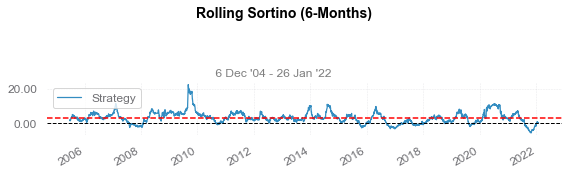

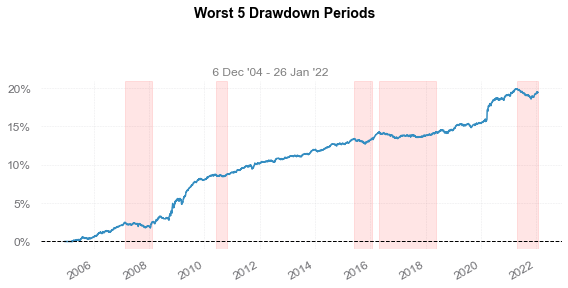

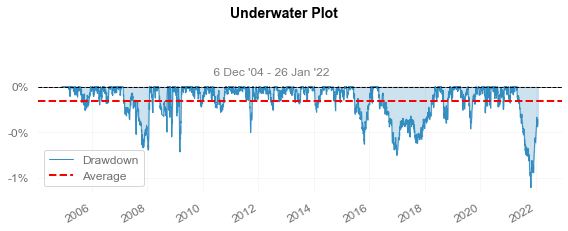

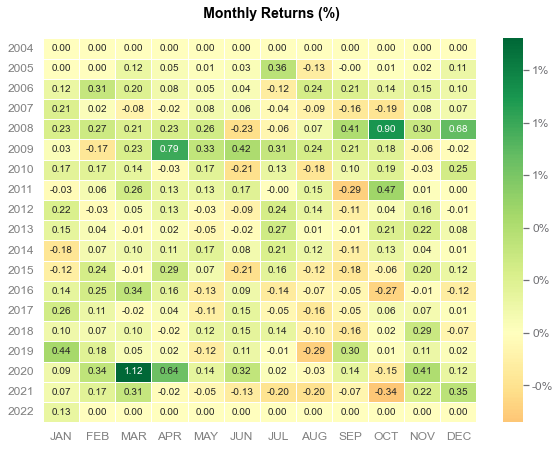

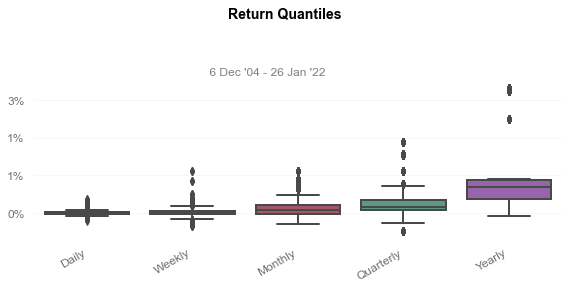

In [230]:
#qs.reports.full((signals.div(signals.abs().sum(1), 0).shift(1) * residuals * 5).sum(1), 'SPY')

Good! Our residuals look fairly reasonable.

# CNN-Transformer Networks

In [279]:
import torch
import torch.nn as nn

class CNN_Block(nn.Module):
    def __init__(self, in_filters=1, out_filters=8, normalization=True, filter_size=2):
        super(CNN_Block, self).__init__()  
        self.in_filters = in_filters
        self.out_filters = out_filters
        
        self.conv1 = nn.Conv1d(in_channels=in_filters, out_channels=out_filters, kernel_size=filter_size,
                                    stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
        self.conv2 = nn.Conv1d(in_channels=out_filters, out_channels=out_filters, kernel_size=filter_size,
                                    stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
        self.relu = nn.ReLU(inplace=True)
        self.left_zero_padding = nn.ConstantPad1d((filter_size-1,0),0)
        
        self.normalization1 = nn.InstanceNorm1d(in_filters)
        self.normalization2 = nn.InstanceNorm1d(out_filters)
        self.normalization = normalization
       
    def forward(self, x): #x and out have dims (N,C,T) where C is the number of channels/filters
        if self.normalization:
            x = self.normalization1(x)
        out = self.left_zero_padding(x)
        out = self.conv1(out)
        out = self.relu(out)
        if self.normalization: 
            out = self.normalization2(out)
        out = self.left_zero_padding(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = out + x.repeat(1,int(self.out_filters/self.in_filters),1)   
        return out 

class CNNTransformer(nn.Module):
    def __init__(self, 
                 random_seed = 0, 
                 lookback = 30,
                 device = "cpu", # other options for device are e.g. "cuda:0"
                 normalization_conv = True, 
                 filter_numbers = [1,8], 
                 attention_heads = 4, 
                 use_convolution = True,
                 hidden_units = 2*8, 
                 hidden_units_factor = 2,
                 dropout = 0.25, 
                 filter_size = 2, 
                 use_transformer = True):
        
        super(CNNTransformer, self).__init__()
        if hidden_units and hidden_units_factor and hidden_units != hidden_units_factor * filter_numbers[-1]:
            raise Exception(f"`hidden_units` conflicts with `hidden_units_factor`; provide one or the other, but not both.")
        if hidden_units_factor:
            hidden_units = hidden_units_factor * filter_numbers[-1]
        self.random_seed = random_seed 
        torch.manual_seed(self.random_seed)
        self.device = torch.device(device)
        self.filter_numbers = filter_numbers
        self.use_transformer = use_transformer
        self.use_convolution = use_convolution and len(filter_numbers) > 0
        self.is_trainable = True
        
        self.convBlocks = nn.ModuleList()
        for i in range(len(filter_numbers)-1):
            self.convBlocks.append(
                CNN_Block(filter_numbers[i],filter_numbers[i+1],normalization=normalization_conv,filter_size=filter_size))
        self.encoder = nn.TransformerEncoderLayer(d_model=filter_numbers[-1], nhead=attention_heads, dim_feedforward=hidden_units, dropout=dropout)
        self.linear = nn.Linear(filter_numbers[-1],1)
        #self.softmax = nn.Sequential(nn.Linear(filter_numbers[-1],num_classes), nn.Softmax(dim=1))
                 
    def forward(self, x): #x has dimension (N,T)
        N,T = x.shape
        x = x.reshape((N,1,T))  #(N,1,T)
        if self.use_convolution:
            for i in range(len(self.filter_numbers)-1):
                x = self.convBlocks[i](x) #(N,C,T), C is the number of channels/features
        x = x.permute(2,0,1)
        if self.use_transformer:
            x = self.encoder(x) #the input of the transformer is (T,N,C)
        return self.linear(x[-1,:,:]).squeeze()  # multiply by residuals and divide later by sum of abs, sharpe is -mean/std
        #this outputs the weights 
        #return self.softmax(x[-1,:,:]) #(N,num_classes)

Make predictions based on 30-day lookback of cumulative sum of residuals, and train on rolling 1000-day dataset. Multiply output by residuals and divide later by sum of abs. Sharpe is given by -mean/std

In [665]:
np.array(hedgeWeights).shape

(311, 4281, 311)

In [302]:
yRets = traderets.shift(-1)

In [304]:
yRets

,GPS,FISV,CSX,ADP,ANSS,AFL,SO,REG,LMT,EIX,...,MCHP,TYL,BF-B,MAA,BRK-B,HD,EXC,LH,MTD,SLB
date,,,,,,,,,,,,,,,,,,,,,
2003-12-03,0.001413,0.013479,0.008704,0.009652,0.017895,0.007897,-0.001811,-0.011607,0.026758,-0.008775,...,-0.038764,-0.071687,-0.004346,0.004317,0.001361,-0.020100,0.011529,-0.001767,-0.002656,0.020194
2003-12-04,-0.014629,-0.015218,-0.000187,0.001058,-0.021450,-0.017324,0.004009,-0.008424,-0.007555,0.005452,...,-0.054614,0.019812,-0.004228,0.006039,-0.001184,-0.004475,0.003544,0.000913,-0.000355,0.022274
2003-12-05,0.001772,0.023193,-0.016203,-0.004378,-0.000490,0.013670,-0.005509,0.022183,0.020987,0.015599,...,-0.006934,0.045632,0.002607,0.003605,0.000448,-0.000463,0.007465,0.003570,0.004770,0.009660
2003-12-08,-0.005782,-0.014565,0.000939,-0.003310,0.008971,-0.011593,-0.004588,0.000122,-0.000188,-0.022944,...,-0.040163,0.005737,0.001336,0.000243,-0.002258,-0.018104,-0.008454,-0.012300,-0.005682,0.001854
2003-12-09,-0.005772,-0.000281,0.006521,0.000126,-0.021503,-0.002174,-0.003459,-0.006580,-0.000310,0.011545,...,0.023282,0.002567,-0.005725,-0.001240,-0.000608,-0.028775,0.009900,-0.014019,-0.009549,0.003227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,-0.010317,-0.013658,-0.036183,-0.013727,-0.022409,-0.018381,-0.000935,-0.008098,-0.008482,-0.005569,...,-0.010632,-0.008143,-0.008938,-0.005547,-0.019498,-0.001970,-0.003635,0.002851,-0.007503,-0.018804
2022-01-21,0.075583,-0.020312,0.011057,0.003659,0.023903,0.011119,-0.005916,0.013473,0.002919,-0.010606,...,0.015622,0.021100,0.003135,-0.001874,-0.006204,0.039995,-0.013396,0.000826,0.001299,0.006586
2022-01-24,0.032970,-0.015906,-0.019649,-0.004950,-0.035975,0.005198,-0.003950,-0.004176,0.035945,-0.010736,...,-0.025409,-0.039337,0.004923,-0.017644,0.012571,-0.011455,-0.010966,-0.014066,-0.032631,0.058566


# Outlier Detection

There's a very weird peak in IPG (stock 78) around the end of 2005, in the high minute dataset after and before adjustments. This is probably the Knight capital crash!

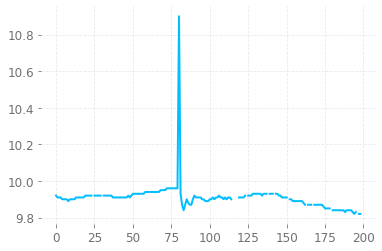

In [76]:
plt.plot(getMinArr('minutesHigh.pickle.pickle')[78, :, :].flatten()[191800:192000])

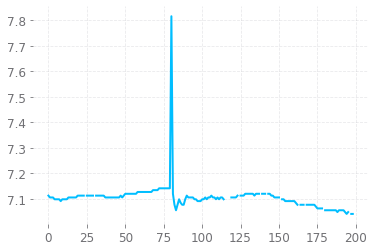

In [95]:
plt.plot(minHigh[78, :, :].flatten()[191800:192000])

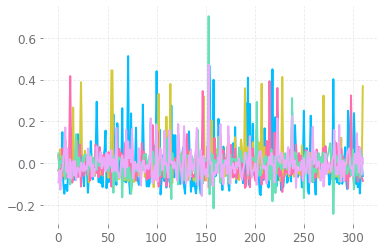

In [13]:
PCA(n_components=5).fit_transform(adjclose.pct_change(1).iloc[:1000,:].dropna().T)

In [26]:
import multiprocessing
from concurrent.futures import ProcessPoolExecutor
from itertools import repeat

#def pca_fit(date, returns = returns, n_components=n_factors, lookback=lookback, olslookback=olslookback):
#    winrets = returns[returns.index < date].iloc[-lookback:,:]
#    return pd.DataFrame(PCA(n_components=n_components, whiten=True).fit(winrets).transform(winrets.iloc[-olslookback:, :]),
#                        index = winrets.index[-olslookback:],
#                        columns = [i for i in range(n_components)])
    
#with ProcessPoolExecutor(max_workers=10, mp_context=multiprocessing.get_context('fork')) as executor:
#    future = executor.map(pca_fit, returns.index[lookback:])
#    executor.shutdown()
#factors = list(future)

Now, we do the same thing, except we transform the returns on the day itself to get the factor returns for that day, $\text{Factors}_t$.

In [ ]:
#def pca_t(date, returns=returns, signalrets=signalrets, n_components=n_factors, lookback=lookback, olslookback=olslookback):
#    winrets = returns[returns.index < date].iloc[-lookback:,:]
#    return pd.Series(PCA(n_components=n_components, whiten=True).fit(winrets).transform([signalrets.loc[date]]).flatten(),
#                        index = [i for i in range(n_components)])

'''
with ProcessPoolExecutor(max_workers=10, mp_context=multiprocessing.get_context('fork')) as executor:
    future = executor.map(pca_t, returns.index[lookback:])
    executor.shutdown()
factors_t = list(future)

factors_tDF = pd.concat(factors_t, 1)
factors_tDF.columns = returns.index[lookback:]
factors_tDF = factors_tDF.T
factors_tDF
'''

In [252]:
'''
def getBetas(stock, returns=returns, factors=factors, olslookback=olslookback):
    betaStock = []
    for date in factors.index:
        X = factors[date]
        y = returns[stock][returns.index < date][-olslookback:]
        betaStock.append((np.linalg.pinv(X.T @ X) @ X.T @ y).values)
    return pd.Series(betaStock, index=factors.index)

with ProcessPoolExecutor(max_workers=10, mp_context=multiprocessing.get_context('fork')) as executor:
    future = executor.map(getBetas, returns.columns)
    executor.shutdown()
betas = list(future)
betaDF = pd.concat(betas, 1)
betaDF.columns = returns.columns
betaDF['AAPL']
'''

In [254]:
'''
def getResids(stock, signalrets=signalrets, factors_tDF=factors_tDF, betaDF=betaDF):
    resid = []
    for date in betaDF.index:
        resid.append(signalrets.loc[date, stock] - np.dot(factors_tDF.loc[date], betaDF.loc[date, stock]))
    return pd.Series(resid, index=betaDF.index)

with ProcessPoolExecutor(max_workers=10, mp_context=multiprocessing.get_context('fork')) as executor:
    future = executor.map(getResids, returns.columns)
    executor.shutdown()
resids = list(future)

residDF = pd.concat(resids, 1)
residDF.columns = returns.columns
residDF
'''

In [256]:
with ProcessPoolExecutor(max_workers=10, mp_context=multiprocessing.get_context('fork')) as executor:
    future = executor.map(pca_t, returns.index[lookback:], repeat(returns), repeat(traderets))
    executor.shutdown()
factors_tminus = list(future)
factors_tDFm = pd.concat(factors_tminus, 1)
factors_tDFm.columns = returns.index[lookback:]
factors_tDFm = factors_tDFm.T
factors_tDFm

with ProcessPoolExecutor(max_workers=10, mp_context=multiprocessing.get_context('fork')) as executor:
    future = executor.map(getResids, returns.columns, repeat(traderets), repeat(factors_tDFm))
    executor.shutdown()
residsMinus = list(future)
residDFm = pd.concat(residsMinus, 1)
residDFm.columns = returns.columns
residDFm

,GPS,FISV,CSX,ADP,ANSS,AFL,SO,REG,LMT,EIX,...,MCHP,TYL,BF-B,MAA,BRK-B,HD,EXC,LH,MTD,SLB
date,,,,,,,,,,,,,,,,,,,,,
2004-12-06,-0.013491,0.013988,-0.005826,-0.003075,0.005802,-0.000434,0.011131,0.004484,0.003147,0.002130,...,-0.008919,-0.023991,0.014863,-0.001880,-0.008068,0.006947,0.011393,0.003520,0.006292,-0.002632
2004-12-07,-0.008544,0.006001,0.010319,0.003939,-0.022431,0.003138,0.007646,-0.001651,-0.013085,-0.012924,...,-0.015193,0.017775,0.002523,0.014043,-0.003854,0.005022,-0.008277,-0.003697,-0.012233,0.002310
2004-12-08,0.004100,0.004986,0.019651,-0.001270,0.002568,-0.002686,-0.004853,0.006771,-0.022834,-0.008929,...,-0.004454,0.026757,-0.001040,0.004651,-0.003490,0.012291,-0.011052,0.010707,-0.008999,0.002805
2004-12-09,-0.024217,-0.005528,-0.023048,-0.006935,-0.021296,-0.005244,-0.005994,-0.002054,-0.004620,-0.000232,...,-0.009114,-0.011693,-0.001276,-0.008731,-0.004381,0.001177,-0.000314,0.016237,-0.012756,0.013118
2004-12-10,-0.014511,-0.007791,0.002108,-0.003980,-0.020027,0.002976,-0.001666,0.003411,0.006107,-0.001855,...,-0.004771,0.017561,0.006502,0.004848,-0.004629,-0.010607,0.009588,-0.005530,0.002230,-0.004911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,0.002699,0.009151,0.014151,-0.009630,0.006339,-0.000152,-0.005272,-0.017249,0.000092,-0.002544,...,-0.000960,-0.002014,0.003054,-0.013068,-0.004659,-0.011534,0.015581,0.003202,0.013032,0.013268
2022-01-21,0.011143,0.002734,-0.026109,-0.003366,-0.003081,-0.001294,-0.000097,0.007595,-0.003433,-0.004722,...,0.019615,0.012485,-0.005299,0.006767,-0.009570,0.005786,0.000893,0.005007,0.003801,0.016031
2022-01-24,0.029553,-0.017184,0.002474,-0.001927,0.019716,0.006747,-0.002761,0.004694,0.001718,-0.007026,...,-0.005999,0.015151,-0.000143,-0.004524,-0.009353,0.024812,-0.014479,0.000822,-0.001544,0.007889
